# Boundary conditions

Implement the learning of exercise-2 from day-1 to solve the non-linear Poisson's equation with different boundary conditions. Feel free to create a 2D mesh of your preference for the problem and experiment with different boundary conditions. Write the results to XDMF and visualize them in PARAVIEW.

See what happens to the error when you change the domain to a rectangular domain with dimensions $2 \times 1$

In [18]:
from dolfin import *
import numpy

mesh = UnitSquareMesh(32, 32)
# mesh = RectangleMesh(Point(0, 0), Point(2, 1), 2, 1)
V = FunctionSpace(mesh, 'Lagrange', 1)

left_boundary = CompiledSubDomain("on_boundary && near(x[0],0)")
right_boundary = CompiledSubDomain("on_boundary && near(x[0],1)")
top_boundary = CompiledSubDomain("on_boundary && near(x[1],1)")
bottom_boundary = CompiledSubDomain("on_boundary && near(x[1],0)")

bc_0 = DirichletBC(V, Constant(0.0), left_boundary)
bc_1 = DirichletBC(V, Constant(1.0), right_boundary)
bcs = [bc_0, bc_1]

m = 5


def q(u):
    return (1+u)**m

# Define variational problem
v = TestFunction(V)
du = TrialFunction(V)
u = Function(V)  # most recently computed solution
F = inner(q(u)*nabla_grad(u), nabla_grad(v))*dx

J = derivative(F, u, du)

# Compute solution
problem = NonlinearVariationalProblem(F, u, bcs, J)
solver = NonlinearVariationalSolver(problem)

prm = solver.parameters
prm['newton_solver']['absolute_tolerance'] = 1E-5
prm['newton_solver']['relative_tolerance'] = 1E-5
prm['newton_solver']['maximum_iterations'] = 25

solver.solve()


(6, True)

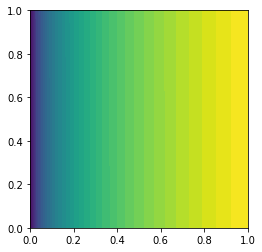

In [19]:
plot(u)

In [20]:

# Find max error
u_exact = Expression(
    'pow((pow(2, m+1)-1)*x[0] + 1, 1.0/(m+1)) - 1', m=m, degree=1)
u_e = interpolate(u_exact, V)
diff = numpy.abs(u_e.vector()[:] - u.vector()[:]).max()
print('Unitsquaremesh Max error:{0:5.3e}'.format(diff))

Unitsquaremesh Max error:4.953e-03


In [17]:

# Find max error
u_exact = Expression(
    'pow((pow(2, m+1)-1)*x[0] + 1, 1.0/(m+1)) - 1', m=m, degree=1)
u_e = interpolate(u_exact, V)
diff = numpy.abs(u_e.vector()[:] - u.vector()[:]).max()
print('Rectanglemesh Max error:{0:5.3e}'.format(diff))

Rectanglemesh Max error:2.420e-01
